# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Loading the dataset

In [2]:
dataset = pd.read_csv('insurance.csv')

# Data preprocessing(data cleaning)

In [3]:
df_dataset = pd.DataFrame()
n_sex={'female':0,'male':1}
n_smoker={'yes':0,'no':1}
n_region={'southwest':0,'southeast':1,'northwest':2,'northeast':4}

def clean_sex(x):
    return n_sex[x]
def clean_region(x):
    return n_region[x]
def clean_smoker(x):
    return n_smoker[x]
df_dataset['age']=dataset['age']
df_dataset['sex']=dataset['sex'].apply(clean_sex)
df_dataset['bmi']=dataset['bmi']
df_dataset['children']=dataset['children']
df_dataset['smoker']=dataset['smoker'].apply(clean_smoker)
df_dataset['region']=dataset['region'].apply(clean_region)
df_dataset['charges']=dataset['charges']
print(df_dataset.head(10))

   age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       0       0  16884.92400
1   18    1  33.770         1       1       1   1725.55230
2   28    1  33.000         3       1       1   4449.46200
3   33    1  22.705         0       1       2  21984.47061
4   32    1  28.880         0       1       2   3866.85520
5   31    0  25.740         0       1       1   3756.62160
6   46    0  33.440         1       1       1   8240.58960
7   37    0  27.740         3       1       2   7281.50560
8   37    1  29.830         2       1       4   6406.41070
9   60    0  25.840         0       1       2  28923.13692


In [4]:
Y = df_dataset.iloc[:,-1:].values
df_dataset1 = df_dataset.copy()
del df_dataset1['charges']

X=df_dataset1.iloc[::].values
print(X)
print(Y)

[[19.    0.   27.9   0.    0.    0.  ]
 [18.    1.   33.77  1.    1.    1.  ]
 [28.    1.   33.    3.    1.    1.  ]
 ...
 [18.    0.   36.85  0.    1.    1.  ]
 [21.    0.   25.8   0.    1.    0.  ]
 [61.    0.   29.07  0.    0.    2.  ]]
[[16884.924 ]
 [ 1725.5523]
 [ 4449.462 ]
 ...
 [ 1629.8335]
 [ 2007.945 ]
 [29141.3603]]


In [5]:
std_x = StandardScaler()
std_y = StandardScaler()
X = std_x.fit_transform(X)
Y = std_y.fit_transform(Y)

# Creating feature matrix 'X' and target vector 'Y'

In [6]:
feature_names = ['age','sex','bmi','children','smoker','region']
X = df_dataset[feature_names]
Y = df_dataset.charges

# Splitting the data into train and test using sklearn(80:20)

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

# Fitting the model using DecisionTree Regression from sklearn

In [8]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(splitter='random')
regressor.fit(X_train, Y_train)

DecisionTreeRegressor(splitter='random')

# Checking the training error

In [9]:
training_score= regressor.score(X_train, Y_train)
train_error=1-training_score
print("Training score : ",training_score,"\nTraining error : ",train_error)

Training score :  0.9982963931606104 
Training error :  0.0017036068393896375


# Predict targets using test dataset

In [10]:
from sklearn.metrics import mean_squared_error,r2_score
Y_pred =regressor.predict(X_test)

# Comparing actual targets (X-axis) Vs predicted targets(Y-aixs)

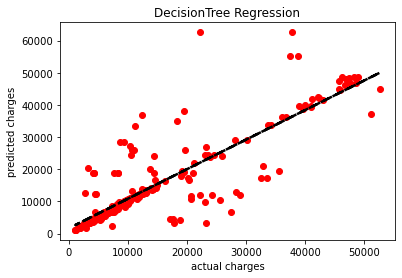

In [11]:
  plt.scatter(Y_test, Y_pred, color = 'red') 
  plt.title('DecisionTree Regression') 
  plt.xlabel('actual charges') 
  plt.ylabel('predicted charges') 
  m, b = np.polyfit(Y_test, Y_pred, 1)
  plt.plot(Y_test, m*Y_test+b,'k--', lw=2.5)
 
  plt.show() 

# Checking testing error

In [12]:
from sklearn.metrics import r2_score
r2_test = r2_score(Y_test, Y_pred)
print("R2 score for test dataset : ",r2_test)
print("Test error                :",1-r2_test)

R2 score for test dataset :  0.7147595904703736
Test error                : 0.28524040952962637
